In [1]:
## Data Preperation Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Library for plotting
import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FastICA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
from keras import regularizers
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('white')
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset
dataset = pd.read_csv('energydata_complete.csv')
dataset=dataset.drop(['date','lights'],axis=1)

dataset["consumption_level"]=[1 if x>=dataset["Appliances"].mean() else 0 for x in dataset["Appliances"]]


X = dataset.iloc[:,1:27].values #X = dataset.iloc[:,1:].values

y = dataset.iloc[:,27].values

#part 1
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)





dataset.head()
y


X.shape

(19735, 26)

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

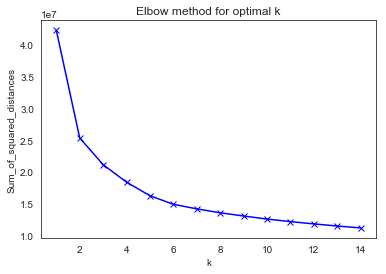

In [4]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km=km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()


<h3> We see that the optimal number of Clusters is 2</h3>

In [5]:
# Fitting K-Means to the dataset
from scipy import stats

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X_train)
prediction = kmeans.predict(X_test)
prediction1= (prediction>.5).astype('int')



acc_kmeans=accuracy_score(y_test, prediction1)*100
acc_kmeans

37.00388447897315

Text(92.68, 0.5, 'predicted label')

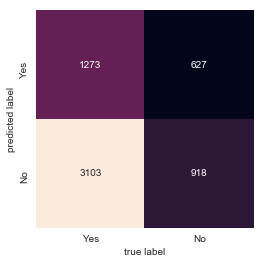

In [6]:
#Confusion Matrix
cm_kmeans = confusion_matrix(y_test, prediction1)
sns.heatmap(cm_kmeans.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [7]:
# Getting the cluster centers
C = kmeans.cluster_centers_
C

array([[ 1.00394014,  0.20813206,  1.00048693, -0.08903924,  1.05944007,
        -0.14939475,  1.05936425,  0.03447494,  1.04883161, -0.13303992,
         1.02494834, -1.04227621,  1.08690041,  0.07275954,  0.93248957,
        -0.12260345,  1.09874568, -0.00232816,  1.03414712, -0.11688218,
        -0.67753514, -0.1116201 , -0.1185233 ,  0.75887498, -0.02157986,
        -0.02157986],
       [-0.48632733, -0.10082305, -0.48465453,  0.04313227, -0.51321253,
         0.0723696 , -0.5131758 , -0.0167003 , -0.5080736 ,  0.06444702,
        -0.4965041 ,  0.50489804, -0.52651483, -0.03524608, -0.45171534,
         0.0593914 , -0.53225291,  0.0011278 , -0.50096016,  0.05661991,
         0.32821066,  0.05407086,  0.0574149 , -0.3676132 ,  0.01045369,
         0.01045369]])

Text(0.5, 1.0, 'cluster centroids')

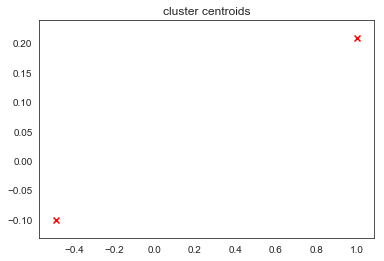

In [8]:
plt.scatter(C[:, 0], C[:, 1], c='red', marker='x')
plt.title('cluster centroids')

In [9]:
labels = kmeans.labels_
print(labels)

[1 1 1 ... 1 0 1]


In [10]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.3598682543704079


In [11]:
def converter(cluster):
    if cluster=='1':
        return 1
    else:
        return 0


In [18]:
dataset['Cluster'] = dataset["consumption_level"].apply(converter)
dataset.head()


,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,consumption_level,Cluster
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,0,0
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,0,0
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,0,0
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,0,0
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,0,0


In [13]:
dataset.shape

(19735, 29)

In [17]:
X_ann = np.array(dataset.drop(['consumption_level'], 1).astype(float))
y_ann= np.array(dataset['consumption_level'])

X_ann.shape
y_ann

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [19]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y_ann, test_size=0.3, random_state=1)

In [20]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=28, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
# Fitting our model 
history=classifier.fit(X_train_ann, y_train_ann, batch_size = 10, epochs = 50,validation_split=0.3)
#ann1 = classifier.fit(X_train_ann, y_train_ann, validation_data = (X_test_ann,y_test_ann),batch_size = 10, nb_epoch = 5, callbacks = [callback], verbose =1)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 9669 samples, validate on 4145 samples
Epoch 1/50
9669/9669 [==============================] - 2s 167us/step - loss: 0.3227 - acc: 0.8751 - val_loss: 0.1637 - val_acc: 0.9636
Epoch 2/50
9669/9669 [==============================] - 1s 140us/step - loss: 0.1303 - acc: 0.9860 - val_loss: 0.0948 - val_acc: 1.0000
Epoch 3/50
9669/9669 [==============================] - 1s 145us/step - loss: 0.0801 - acc: 0.9938 - val_loss: 0.0622 - val_acc: 1.0000
Epoch 4/50
9669/9669 [==============================] - 1s 138us/step - loss: 0.0476 - acc: 0.9977 - val_loss: 0.0336 - val_acc: 1.0000
Epoch 5/50
9669/9669 [==============================] - 1s 117us/step - loss: 0.0318 - acc: 0.9980 - val_loss: 0.0246 - val_acc: 1.0000
Epoch 6/50
9669/9669 [==============================] - 1s 134us/step - loss: 0.0199 - acc: 0.9995 - val_loss: 0.0143 - val_acc: 1.0000
Epoch 7/50
9669/

In [21]:

# Predicting the Test set results
y_pred_ann = classifier.predict(X_test_ann)
y_pred_ann = (y_pred_ann > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test_ann, y_pred_ann)
accu=accuracy_score(y_test_ann,y_pred_ann)
print(cm,"\n")
print("The accuracy is",accu)

[[4329    0]
 [   0 1592]] 

The accuracy is 1.0


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


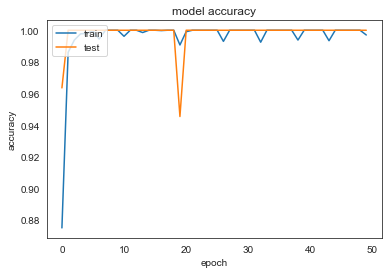

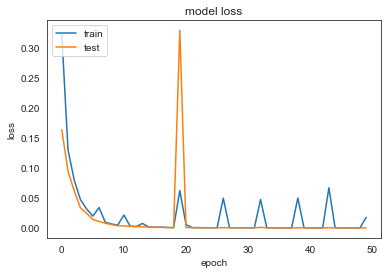

In [22]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# Predicting the Test set results
y_pred_ann_1 = classifier.predict(X_test_ann)

#Convert Prediction to Int
y_pred_ann_1= (y_pred_ann_1>.5).astype('int')


Text(92.68, 0.5, 'predicted label')

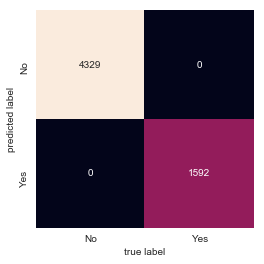

In [24]:
#Confusion Matrix
cm_ann_1 = confusion_matrix(y_test_ann, y_pred_ann_1)
sns.heatmap(cm_ann_1.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [25]:
acc_ann_1= round(100*accuracy_score(y_test_ann,y_pred_ann_1),2)
print(acc_ann_1)


100.0


Text(92.68, 0.5, 'predicted label')

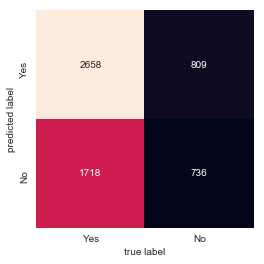

In [27]:
##Expectation Maximization
Gaussian = GaussianMixture(n_components=2,random_state=0)
Gaussian.fit(X_train)
predictions = Gaussian.predict(X_test)
predictions1= (predictions>.5).astype('int')
probs = Gaussian.predict_proba(X_train)

#Confusion Matrix
cm_em = confusion_matrix(y_test, predictions1)
sns.heatmap(cm_em.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [28]:
acc_em= round(100*accuracy_score(y_test,predictions1),2)
print(acc_em)

57.32


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std=scaler.fit_transform(X)
X_std

array([[-1.11864475,  1.84382063, -0.52041138, ...,  0.3669753 ,
        -0.80797358, -0.80797358],
       [-1.11864475,  1.61680671, -0.52041138, ...,  0.34313479,
        -0.44024015, -0.44024015],
       [-1.11864475,  1.51795932, -0.52041138, ...,  0.31929428,
         0.25210868,  0.25210868],
       ...,
       [ 2.37445166,  1.59251371,  2.41110339, ...,  2.26626907,
         0.29049435,  0.29049435],
       [ 2.37445166,  1.6913611 ,  2.31325594, ...,  2.25832223,
        -1.28759013, -1.28759013],
       [ 2.37445166,  1.5933514 ,  2.24498422, ...,  2.2503754 ,
         0.6298737 ,  0.6298737 ]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1)

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
pca_X_train=pca.fit_transform(X_train)
pca_X_test=pca.fit_transform(X_test)



In [32]:
pca.get_covariance()

array([[ 9.85169930e-01,  1.76716786e-01,  8.26821401e-01,
         1.14936754e-02,  8.81509203e-01, -2.14292772e-02,
         8.59186509e-01,  1.08546701e-01,  8.76268822e-01,
        -1.96995621e-03,  6.47273364e-01, -6.03759633e-01,
         8.23912126e-01,  1.31978274e-01,  8.08913026e-01,
        -4.95319582e-03,  8.33853123e-01,  8.10330789e-02,
         6.74126148e-01, -1.41043924e-01, -3.35085891e-01,
        -8.99073314e-02, -5.63863964e-02,  5.66643435e-01,
         4.86158134e-03,  4.86158134e-03],
       [ 1.76716786e-01,  1.01472797e+00,  2.76228498e-01,
         8.09166251e-01,  2.72997033e-01,  8.55473275e-01,
         1.15634313e-01,  8.83979866e-01,  2.19115508e-01,
         3.08067799e-01,  3.20712186e-01,  2.38883272e-01,
         2.91738266e-02,  8.02227326e-01, -1.63726800e-02,
         7.40521312e-01,  1.24486824e-01,  7.70072623e-01,
         3.46719539e-01, -3.01163212e-01,  2.76766065e-01,
         2.20274541e-01, -1.21189764e-02,  6.50084242e-01,
         7.75

In [38]:
explained_variance=pca.explained_variance_ratio_
explained_variance.shape

(26,)

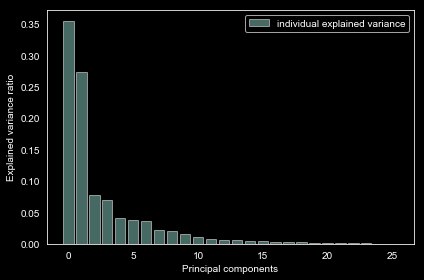

In [39]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(26), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [40]:
pca=PCA(n_components=2)
X_new=pca.fit_transform(X_std)
X_new

array([[-2.79696823, -4.57706154],
       [-2.81568201, -4.50609859],
       [-2.85677909, -4.42095731],
       ...,
       [ 7.8604374 , -2.65161048],
       [ 7.74440682, -2.65026703],
       [ 7.62366257, -2.61005804]])

In [41]:
pca.get_covariance()

array([[ 1.21080975e+00,  1.97038076e-01,  7.49468034e-01,
         1.36617172e-02,  8.15275812e-01, -4.88054198e-02,
         8.03636919e-01,  9.03934005e-02,  8.03875324e-01,
        -6.61810347e-02,  7.38219104e-01, -6.71266479e-01,
         7.97515892e-01,  1.31078181e-01,  7.26513839e-01,
        -2.02009762e-02,  8.20529867e-01,  7.16341243e-02,
         7.47254379e-01, -1.51600340e-01, -4.12125272e-01,
        -4.44766674e-02, -9.96816549e-02,  6.06441498e-01,
        -9.52752424e-03, -9.52752424e-03],
       [ 1.97038076e-01,  1.19207482e+00,  2.56718288e-01,
         6.78590334e-01,  2.48345607e-01,  7.62566625e-01,
         1.02099247e-01,  8.20495775e-01,  2.13778524e-01,
         3.18175306e-01,  2.90103226e-01,  2.62544722e-01,
         2.64673324e-02,  8.08605218e-01, -1.44672320e-02,
         7.64472958e-01,  1.12144242e-01,  7.70635936e-01,
         3.25037488e-01, -2.92554805e-01,  3.07417951e-01,
         2.22510914e-01, -7.84104476e-03,  6.31201360e-01,
        -1.03

In [42]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.35826928, 0.27129403])

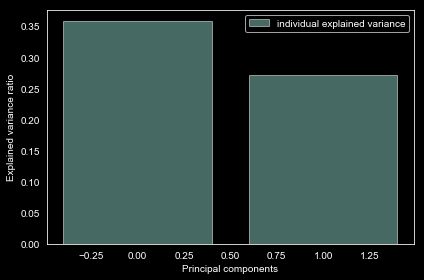

In [43]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(2), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [44]:
##K means with PCA

kmeans_pca = KMeans(n_clusters=2,random_state=0)

pca_2 = PCA(n_components=2)

X_kmeans_PCA = pca_2.fit_transform(pca_X_train)

y_kmeans_2 = kmeans_pca.fit_predict(pca_X_train)

kmeans_pca.fit(pca_X_train)
Prediction_kmeans_pca = kmeans_pca.fit_predict(pca_X_test)

Prediction_kmeans_pca1= (Prediction_kmeans_pca>.5).astype('int')

##accuracy
acc_kmeans_pca= round(100*accuracy_score(y_test,Prediction_kmeans_pca1),2)
print(acc_kmeans_pca)




62.91


Text(92.68, 0.5, 'predicted label')

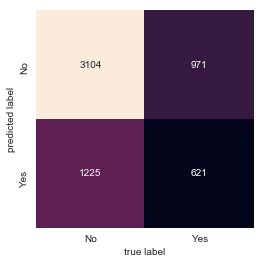

In [45]:
#Confusion Matrix
cm_kmeans_pca = confusion_matrix(y_test, Prediction_kmeans_pca1)
sns.heatmap(cm_kmeans_pca.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


No handles with labels found to put in legend.


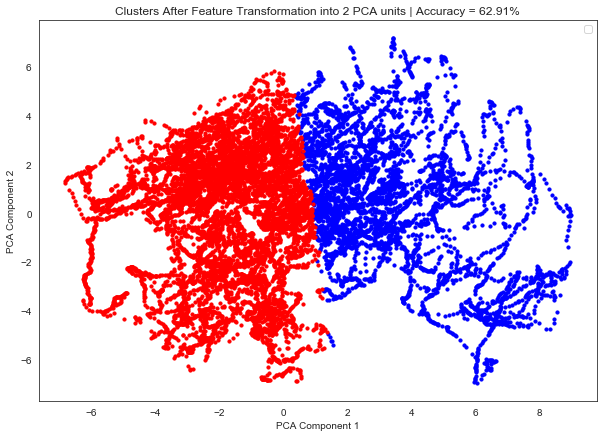

In [46]:
# Visualising the clusters
plt.figure(figsize=(10,7))
plt.scatter(X_kmeans_PCA[y_kmeans_2 == 0, 0], X_kmeans_PCA[y_kmeans_2 == 0, 1], s = 10, c = 'blue')
plt.scatter(X_kmeans_PCA[y_kmeans_2 == 1, 0], X_kmeans_PCA[y_kmeans_2 == 1, 1], s = 10, c = 'red')
plt.title("Clusters After Feature Transformation into 2 PCA units | Accuracy = {}%".format(acc_kmeans_pca))
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()


In [47]:
#Experiment 1
#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu', input_dim = 26))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting our model 
ann_pca=classifier.fit(pca_X_train, y_train_ann, batch_size = 10, epochs = 50,validation_split=0.3)
#a

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=26, units=10, kernel_initializer="uniform")`
  
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Train on 9669 samples, validate on 4145 samples
Epoch 1/50
9669/9669 [==============================] - 2s 158us/step - loss: 0.4986 - acc: 0.7623 - val_loss: 0.4404 - val_acc: 0.7983
Epoch 2/50
9669/9669 [==============================] - 1s 139us/step - loss: 0.4331 - acc: 0.7987 - val_loss: 0.4215 - val_acc: 0.8111
Epoch 3/50
9669/9669 [==============================] - 1s 113us/step - loss: 0.4166 - acc: 0.8064 - val_loss: 0.4134 - val_acc: 0.8147
Epoch 4/50
9669/9669 [==============================] - 1s 147us/step - loss: 0.4055 - acc: 0.8120 - val_loss: 0.4061 - val_acc: 0.8169
Epoch 5/50
9669/9669 [==============================] - 1s 127us/step - loss: 0.3968 - acc: 0.8146 - val_loss: 0.4044 - val_acc: 0.8152
Epoch 6/50
9669/9669 [==============================] - 1s 140us/step - loss: 0.3923 - acc: 0.8196 - val_loss: 0.3999 - val_acc: 0.8157
Epoch 7/50
9669/9669 [==============================] - 1s 115us/step - loss: 0.3885 - acc: 0.8222 - val_loss: 0.3989 - val_acc: 0.8186


In [48]:

# Predicting the Test set results
y_pred_ann_pca = classifier.predict(pca_X_test)

#Convert Prediction to Int
y_pred_ann_pca1= (y_pred_ann_pca>.5).astype('int')


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


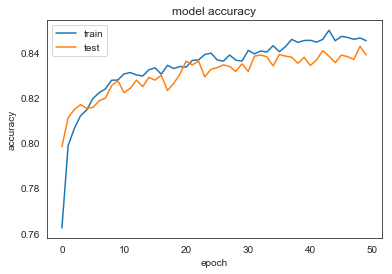

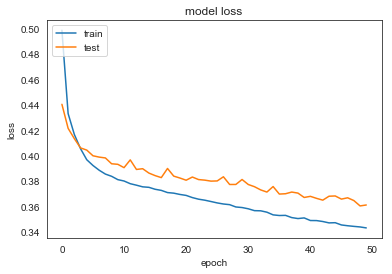

In [49]:

# list all data in history
print(ann_pca.history.keys())
# summarize history for accuracy
plt.plot(ann_pca.history['acc'])
plt.plot(ann_pca.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(ann_pca.history['loss'])
plt.plot(ann_pca.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(92.68, 0.5, 'predicted label')

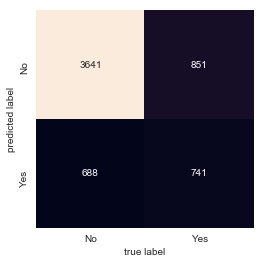

In [50]:
#Confusion Matrix
cm_ann = confusion_matrix(y_test, y_pred_ann_pca1)
sns.heatmap(cm_ann.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [51]:
acc_ann_pca= round(100*accuracy_score(y_test,y_pred_ann_pca1),2)
print(acc_ann_pca)


74.01


Text(92.68, 0.5, 'predicted label')

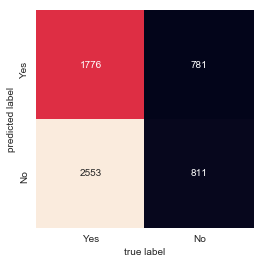

In [52]:
##EM with PCA
Gaussian = GaussianMixture(n_components=2,random_state=0)#covariance_type='tied')
Gaussian.fit(pca_X_train)
predictions_em_pca = Gaussian.predict(pca_X_test)
predictions_em_pca1= (predictions_em_pca>.5).astype('int')
probs = Gaussian.predict_proba(pca_X_test)

#Confusion Matrix
cm_em_pca= confusion_matrix(y_test, predictions_em_pca1)
sns.heatmap(cm_em_pca.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


In [53]:
acc_em_pca= round(100*accuracy_score(y_test,predictions_em_pca1),2)
print(acc_em_pca)


43.69


<h3>ICA</h3>

In [54]:
##ICA
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X=ICA.fit_transform(X_train)




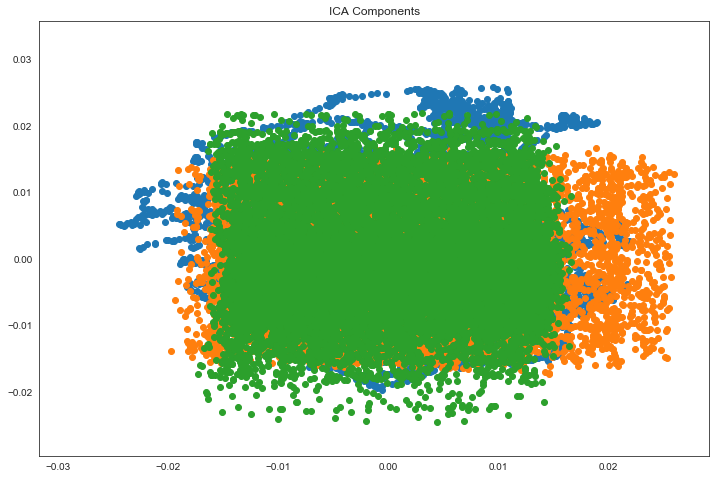

In [55]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,1], X[:,2])
plt.scatter(X[:,2], X[:,0])

In [56]:
ica_X_train = ICA.fit_transform(X_train)
ica_X_test = ICA.fit_transform(X_test)

In [57]:
## K means with ICA

kmeans_ica = KMeans(n_clusters=2, random_state=100)
ica2=FastICA(n_components=3, random_state=12)
X_kmeans_ica = ica2.fit_transform(ica_X_train)

kmeans_ica.fit(ica_X_train)

Prediction_kmeans_ica = kmeans_ica.fit_predict(ica_X_test)
prediction_kmeans_ica1= (Prediction_kmeans_ica>.5).astype('int')

acc_kmeans_ica= round(100*accuracy_score(y_test,prediction_kmeans_ica1),2)
print(acc_kmeans_ica)


48.3


Text(92.68, 0.5, 'predicted label')

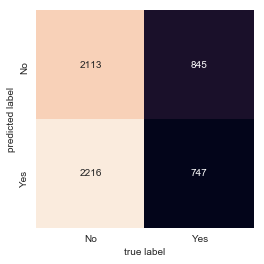

In [58]:
#Confusion Matrix
cm_kmeans_ica = confusion_matrix(y_test, prediction_kmeans_ica1)
sns.heatmap(cm_kmeans_ica.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(92.68, 0.5, 'predicted label')

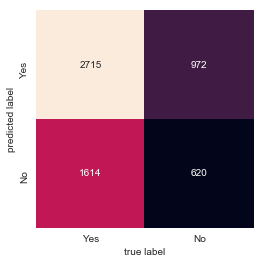

In [59]:
## EM with ICA

Gaussian = GaussianMixture(n_components=2,random_state=0)#covariance_type='tied')
Gaussian.fit(ica_X_train)
predictions_em_ica = Gaussian.predict(ica_X_test)
predictions_em_ica1= (predictions_em_ica>.5).astype('int')
probs = Gaussian.predict_proba(ica_X_test)

#Confusion Matrix
cm_em_ica= confusion_matrix(y_test, predictions_em_ica1)
sns.heatmap(cm_em_ica.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


In [60]:
acc_em_ica= round(100*accuracy_score(y_test,predictions_em_ica1),2)
print(acc_em_ica)


56.32


<h3>Randomised Projection</h3>

In [61]:
##Randomized Projection
from sklearn.random_projection import GaussianRandomProjection
grp = GaussianRandomProjection(n_components=3, eps=0.1, random_state=420)
rca_X_train = grp.fit_transform(X_train)
rca_X_test = grp.fit_transform(X_test)

In [62]:
##K means with RCA
kmeans_rca = KMeans(n_clusters=2, random_state=99)
rca2= PCA(n_components=2)
X_kmeans_RCA= rca2.fit_transform(rca_X_train)

kmeans_rca.fit(rca_X_train)

prediction_kmeans_rca = kmeans_pca.fit_predict(rca_X_test)
prediction_kmeans_rca1= (prediction_kmeans_rca>.5).astype('int')

##accuracy
acc_kmeans_rca= round(100*accuracy_score(y_test,prediction_kmeans_rca1),2)
print(acc_kmeans_rca)




46.66


Text(92.68, 0.5, 'predicted label')

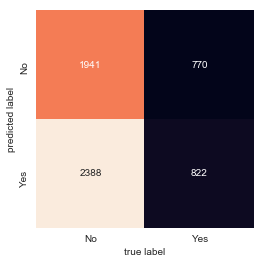

In [63]:
#Confusion Matrix
cm_kmeans_rca = confusion_matrix(y_test, prediction_kmeans_rca1)
sns.heatmap(cm_kmeans_rca.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(92.68, 0.5, 'predicted label')

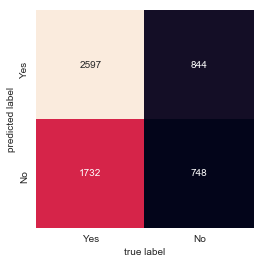

In [64]:
## EM with RP

Gaussian = GaussianMixture(n_components=2,random_state=0)#covariance_type='tied')
Gaussian.fit(rca_X_train)
predictions_em_rca = Gaussian.predict(rca_X_test)
predictions_em_rca1= (predictions_em_rca>.5).astype('int')
probs = Gaussian.predict_proba(rca_X_test)

#Confusion Matrix
cm_em_rca= confusion_matrix(y_test, predictions_em_rca1)
sns.heatmap(cm_em_rca.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


In [65]:
acc_em_rca= round(100*accuracy_score(y_test,predictions_em_rca1),2)
print(acc_em_rca)


56.49


<h3>Feature selection</h3>

In [66]:
##Feature Selection
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),  
           k_features=5,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=2)

In [67]:
features = feature_selector.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppDa

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

In [68]:
filtered_features= features.k_feature_idx_
filtered_features

(2, 12, 16, 18, 19)

<h3>K Means with forward selection</h3>

In [69]:
X_feature = np.array(dataset.iloc[:,[1,2,12,16,19]])
y_feature = np.array(dataset['consumption_level'])

In [70]:
X_feature.shape

(19735, 5)

In [71]:
y_feature.shape

(19735,)

In [72]:
X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y_feature, test_size=0.3, random_state=1)

In [73]:
##K means with Feature Selection
kmeans_feature = KMeans(n_clusters=2, random_state=99)
feature2= PCA(n_components=2)
X_kmeans_feature= feature2.fit_transform(X_train_feature)

kmeans_feature.fit(X_train_feature)

prediction_kmeans_feature = kmeans_feature.fit_predict(X_test_feature)
prediction_kmeans_feature1= (prediction_kmeans_feature>.5).astype('int')

##accuracy
acc_kmeans_feature= round(100*accuracy_score(y_test_feature,prediction_kmeans_feature1),2)
print(acc_kmeans_feature)


41.28


Text(92.68, 0.5, 'predicted label')

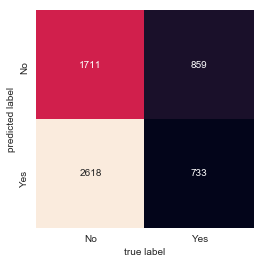

In [74]:
#Confusion Matrix
cm_kmeans_feature = confusion_matrix(y_test_feature, prediction_kmeans_feature1)
sns.heatmap(cm_kmeans_feature.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(92.68, 0.5, 'predicted label')

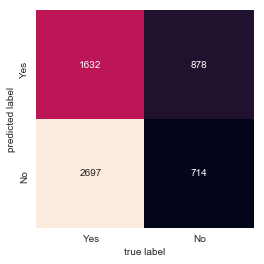

In [75]:
##EM with Feature

Gaussian = GaussianMixture(n_components=2,random_state=0)#covariance_type='tied')
Gaussian.fit(X_train_feature)
predictions_em_feature = Gaussian.predict(X_test_feature)
predictions_em_feature1= (predictions_em_feature>.5).astype('int')
probs = Gaussian.predict_proba(X_test_feature)

#Confusion Matrix
cm_em_feature= confusion_matrix(y_test_feature, predictions_em_feature1)
sns.heatmap(cm_em_feature.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [76]:
acc_em_feature= round(100*accuracy_score(y_test_feature,prediction_kmeans_feature1),2)
print(acc_em_feature)


41.28


,accuracy
Original,37.003884
PCA,62.910000
RCA,48.300000
ICA,46.660000
Step Forward Selection,41.280000


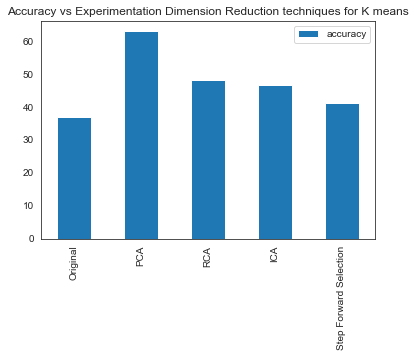

In [78]:
z_kmeans = pd.DataFrame(data = [acc_kmeans,acc_kmeans_pca,acc_kmeans_ica, acc_kmeans_rca, acc_kmeans_feature],index = ['Original','PCA','RCA', 'ICA', 'Step Forward Selection'],columns=[ "accuracy"])
#comparing results
z_kmeans.plot(kind = 'bar',title="Accuracy vs Experimentation Dimension Reduction techniques for K means")
z_kmeans

,accuracy
Original,57.32
PCA,43.69
RCA,56.32
ICA,56.49
Step Forward Selection,41.28


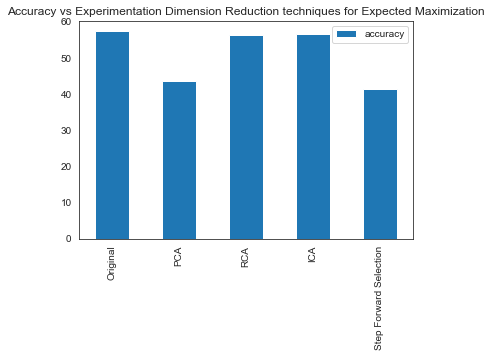

In [80]:
z_em = pd.DataFrame(data = [acc_em,acc_em_pca,acc_em_ica, acc_em_rca, acc_em_feature],index = ['Original','PCA','RCA', 'ICA', 'Step Forward Selection'],columns=[ "accuracy"])
#comparing results
z_em.plot(kind = 'bar',title="Accuracy vs Experimentation Dimension Reduction techniques for Expected Maximization")
z_em

<h1>END</h1>

<h1> Dataset 2 Start</h1>

In [82]:
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

telcom = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
#first few rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [84]:
telcom.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [85]:
# Converting Total Charges to a numerical data type.
telcom.TotalCharges = pd.to_numeric(telcom.TotalCharges, errors='coerce')
telcom.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [86]:
#Removing missing values 
telcom.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telcom.iloc[:,1:]
    #Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [87]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)






from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


(4922, 45)

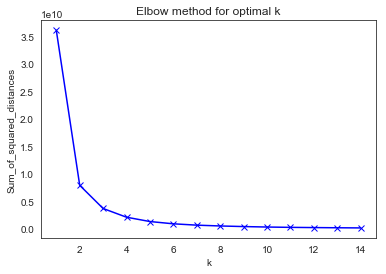

In [88]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km=km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()


In [89]:
# Fitting K-Means to the dataset
from scipy import stats

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X_train)
prediction = kmeans.predict(X_test)
prediction1= (prediction>.5).astype('int')



acc_kmeans=accuracy_score(y_test, prediction1)*100
acc_kmeans

47.81990521327014

Text(92.68, 0.5, 'predicted label')

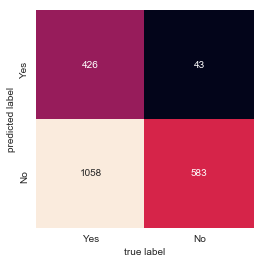

In [90]:
#Confusion Matrix
cm_kmeans = confusion_matrix(y_test, prediction1)
sns.heatmap(cm_kmeans.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [91]:
# Getting the cluster centers
C = kmeans.cluster_centers_
C

array([[-3.44989737e-01, -8.25644207e-02, -1.45436677e+00,
        -7.21309069e-01,  2.70559329e-03, -2.70559329e-03,
         8.96722759e-03, -8.96722759e-03, -2.69498253e-01,
         2.69498253e-01, -3.31373419e-01,  3.31373419e-01,
         5.91084396e-01, -3.31373419e-01, -3.97078324e-01,
        -7.34880985e-01, -8.78872162e-01,  1.91915578e+00,
        -9.92309135e-01,  1.91915578e+00, -6.39612322e-01,
        -8.86156785e-01,  1.91915578e+00, -7.28335525e-01,
        -8.75970864e-01,  1.91915578e+00, -7.37505715e-01,
        -9.77895602e-01,  1.91915578e+00, -6.50982213e-01,
        -8.24886058e-01,  1.91915578e+00, -7.85462526e-01,
        -8.16220130e-01,  1.91915578e+00, -7.93940283e-01,
        -3.94916919e-01,  5.52404678e-02,  4.03892068e-01,
         6.16023520e-01, -6.16023520e-01, -1.13078164e-02,
        -1.56906283e-02, -5.29524220e-01,  6.18798489e-01],
       [ 9.36668078e-02,  2.24167415e-02,  3.94869408e-01,
         1.95839791e-01, -7.34585002e-04,  7.34585002e-

Text(0.5, 1.0, 'cluster centroids')

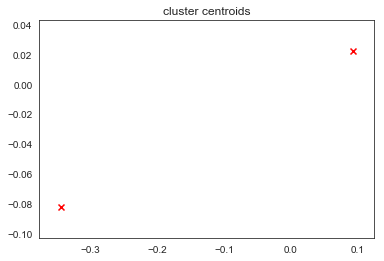

In [92]:
plt.scatter(C[:, 0], C[:, 1], c='red', marker='x')
plt.title('cluster centroids')

In [93]:
labels = kmeans.labels_
print(labels)

[1 1 1 ... 0 1 1]


In [95]:
def converter(cluster):
    if cluster=='1':
        return 1
    else:
        return 0


In [96]:
df_dummies['Cluster'] = df_dummies['Churn'].apply(converter)
df_dummies.head()




,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cluster
0,0,1,29.85,29.85,0,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,1,1,0,1,...,1,0,0,0,1,0,0,0,1,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [97]:
df_dummies.shape

(7032, 47)

In [101]:
X_ann = np.array(df_dummies.drop(['Churn'], 1).astype(float))
y_ann= np.array(df_dummies['Churn'])

X_ann.shape
y_ann

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [102]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y_ann, test_size=0.3, random_state=1)

In [104]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=46, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
# Fitting our model 
history=classifier.fit(X_train_ann, y_train_ann, batch_size = 10, epochs = 50,validation_split=0.3)
#ann1 = classifier.fit(X_train_ann, y_train_ann, validation_data = (X_test_ann,y_test_ann),batch_size = 10, nb_epoch = 5, callbacks = [callback], verbose =1)


Train on 3445 samples, validate on 1477 samples
Epoch 1/50
3445/3445 [==============================] - 1s 275us/step - loss: 0.5595 - acc: 0.7512 - val_loss: 0.5880 - val_acc: 0.7644
Epoch 2/50
3445/3445 [==============================] - 1s 147us/step - loss: 0.5192 - acc: 0.7803 - val_loss: 0.5145 - val_acc: 0.7773
Epoch 3/50
3445/3445 [==============================] - 0s 136us/step - loss: 0.4586 - acc: 0.7919 - val_loss: 0.4671 - val_acc: 0.7813
Epoch 4/50
3445/3445 [==============================] - 1s 161us/step - loss: 0.4467 - acc: 0.7945 - val_loss: 0.4606 - val_acc: 0.7786
Epoch 5/50
3445/3445 [==============================] - 1s 166us/step - loss: 0.4420 - acc: 0.7951 - val_loss: 0.4762 - val_acc: 0.7833
Epoch 6/50
3445/3445 [==============================] - 1s 149us/step - loss: 0.4395 - acc: 0.7968 - val_loss: 0.4574 - val_acc: 0.7833
Epoch 7/50
3445/3445 [==============================] - 1s 170us/step - loss: 0.4374 - acc: 0.7985 - val_loss: 0.4477 - val_acc: 0.7827


In [105]:

# Predicting the Test set results
y_pred_ann = classifier.predict(X_test_ann)
y_pred_ann = (y_pred_ann > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test_ann, y_pred_ann)
accu=accuracy_score(y_test_ann,y_pred_ann)
print(cm,"\n")
print("The accuracy is",accu)

[[1278  277]
 [ 189  366]] 

The accuracy is 0.7791469194312797


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


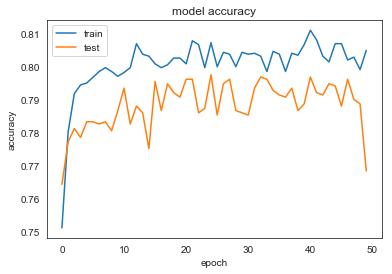

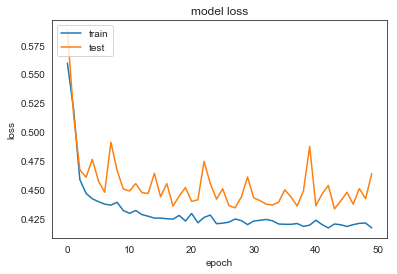

In [106]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [107]:
# Predicting the Test set results
y_pred_ann_1 = classifier.predict(X_test_ann)

#Convert Prediction to Int
y_pred_ann_1= (y_pred_ann_1>.5).astype('int')


Text(92.68, 0.5, 'predicted label')

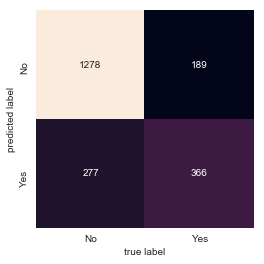

In [108]:
#Confusion Matrix
cm_ann_1 = confusion_matrix(y_test_ann, y_pred_ann_1)
sns.heatmap(cm_ann_1.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [109]:
acc_ann_1= round(100*accuracy_score(y_test_ann,y_pred_ann_1),2)
print(acc_ann_1)


77.91


Text(92.68, 0.5, 'predicted label')

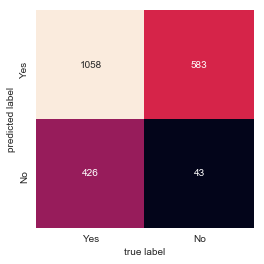

In [110]:
##Expectation Maximization
Gaussian = GaussianMixture(n_components=2,random_state=0)
Gaussian.fit(X_train)
predictions = Gaussian.predict(X_test)
predictions1= (predictions>.5).astype('int')
probs = Gaussian.predict_proba(X_train)

#Confusion Matrix
cm_em = confusion_matrix(y_test, predictions1)
sns.heatmap(cm_em.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [111]:
acc_em= round(100*accuracy_score(y_test,predictions1),2)
print(acc_em)

52.18


In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std=scaler.fit_transform(X)
X_std

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.44032709, -1.28024804, -1.16169394, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [-0.44032709,  0.06430269, -0.26087792, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709, -1.23950408, -0.36392329, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       ...,
       [-0.44032709, -0.87280842, -1.17000405, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [ 2.27103902, -1.15801615,  0.31916782, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709,  1.36810945,  1.35793167, ..., -0.5253508 ,
        -0.71186341, -0.54360352]])

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1)

In [114]:
from sklearn.decomposition import PCA
pca = PCA()
pca_X_train=pca.fit_transform(X_train)
pca_X_test=pca.fit_transform(X_test)



In [115]:
pca.get_covariance()

array([[ 0.95838249,  0.03267763,  0.19024447, ..., -0.01971948,
         0.17568969, -0.13977572],
       [ 0.03267763,  1.00036164,  0.21440464, ...,  0.22931868,
        -0.22294235, -0.2245044 ],
       [ 0.19024447,  0.21440464,  0.99073228, ...,  0.01126797,
         0.29121991, -0.35214644],
       ...,
       [-0.01971948,  0.22931868,  0.01126797, ...,  1.0109127 ,
        -0.37656335, -0.2722176 ],
       [ 0.17568969, -0.22294235,  0.29121991, ..., -0.37656335,
         0.99652391, -0.36070587],
       [-0.13977572, -0.2245044 , -0.35214644, ..., -0.2722176 ,
        -0.36070587,  0.95648342]])

In [116]:
explained_variance=pca.explained_variance_ratio_
explained_variance.shape

(45,)

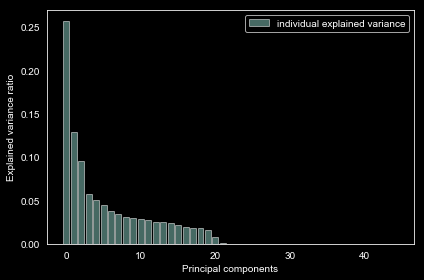

In [117]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(45), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [118]:
pca=PCA(n_components=2)
X_new=pca.fit_transform(X_std)
X_new

array([[-1.99347379, -3.08264623],
       [-0.32851643, -1.21035306],
       [-0.85990346, -2.90702489],
       ...,
       [-1.65705268, -2.33379267],
       [-1.97188919, -2.71532229],
       [-1.83941984,  3.16111405]])

In [119]:
pca.get_covariance()

array([[ 0.7000496 , -0.02304316,  0.17258584, ..., -0.01376199,
         0.0944954 , -0.08126584],
       [-0.02304316,  1.24623453,  0.29759393, ...,  0.19100535,
        -0.18478486, -0.16255865],
       [ 0.17258584,  0.29759393,  1.37211757, ...,  0.07335164,
         0.18699969, -0.35787477],
       ...,
       [-0.01376199,  0.19100535,  0.07335164, ...,  0.70232623,
        -0.06814485, -0.04152555],
       [ 0.0944954 , -0.18478486,  0.18699969, ..., -0.06814485,
         0.82988061, -0.08249247],
       [-0.08126584, -0.16255865, -0.35787477, ..., -0.04152555,
        -0.08249247,  0.81712268]])

In [120]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.25212342, 0.13517441])

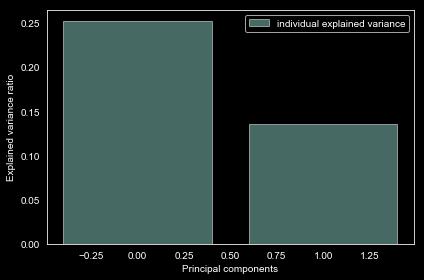

In [121]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(2), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [122]:
##K means with PCA

kmeans_pca = KMeans(n_clusters=2,random_state=0)

pca_2 = PCA(n_components=2)

X_kmeans_PCA = pca_2.fit_transform(pca_X_train)

y_kmeans_2 = kmeans_pca.fit_predict(pca_X_train)

kmeans_pca.fit(pca_X_train)
Prediction_kmeans_pca = kmeans_pca.fit_predict(pca_X_test)

Prediction_kmeans_pca1= (Prediction_kmeans_pca>.5).astype('int')

##accuracy
acc_kmeans_pca= round(100*accuracy_score(y_test,Prediction_kmeans_pca1),2)
print(acc_kmeans_pca)




54.64


Text(92.68, 0.5, 'predicted label')

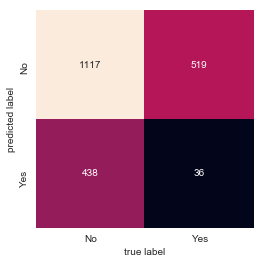

In [123]:
#Confusion Matrix
cm_kmeans_pca = confusion_matrix(y_test, Prediction_kmeans_pca1)
sns.heatmap(cm_kmeans_pca.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


No handles with labels found to put in legend.


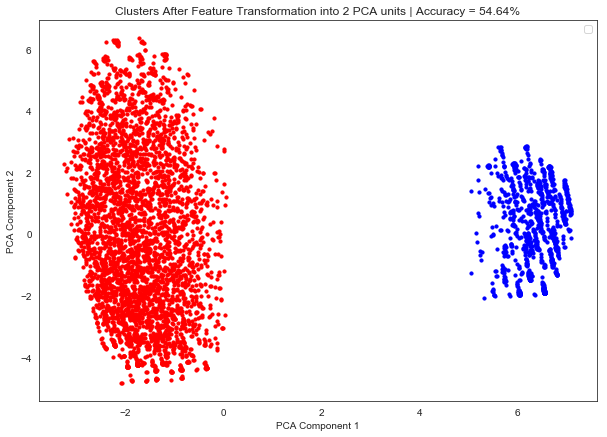

In [124]:
# Visualising the clusters
plt.figure(figsize=(10,7))
plt.scatter(X_kmeans_PCA[y_kmeans_2 == 0, 0], X_kmeans_PCA[y_kmeans_2 == 0, 1], s = 10, c = 'blue')
plt.scatter(X_kmeans_PCA[y_kmeans_2 == 1, 0], X_kmeans_PCA[y_kmeans_2 == 1, 1], s = 10, c = 'red')
plt.title("Clusters After Feature Transformation into 2 PCA units | Accuracy = {}%".format(acc_kmeans_pca))
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()


In [126]:
#Experiment 1
#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu', input_dim = 45))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting our model 
ann_pca=classifier.fit(pca_X_train, y_train_ann, batch_size = 10, epochs = 50,validation_split=0.3)
#a

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=45, units=10, kernel_initializer="uniform")`
  
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Train on 3445 samples, validate on 1477 samples
Epoch 1/50
3445/3445 [==============================] - 1s 289us/step - loss: 0.5213 - acc: 0.7364 - val_loss: 0.4704 - val_acc: 0.7238
Epoch 2/50
3445/3445 [==============================] - 1s 156us/step - loss: 0.4325 - acc: 0.7504 - val_loss: 0.4589 - val_acc: 0.7759
Epoch 3/50
3445/3445 [==============================] - 1s 159us/step - loss: 0.4260 - acc: 0.8055 - val_loss: 0.4552 - val_acc: 0.7861
Epoch 4/50
3445/3445 [==============================] - 1s 162us/step - loss: 0.4214 - acc: 0.8122 - val_loss: 0.4551 - val_acc: 0.7786
Epoch 5/50
3445/3445 [==============================] - 1s 202us/step - loss: 0.4173 - acc: 0.8110 - val_loss: 0.4504 - val_acc: 0.7921
Epoch 6/50
3445/3445 [==============================] - 1s 157us/step - loss: 0.4149 - acc: 0.8099 - val_loss: 0.4500 - val_acc: 0.7915
Epoch 7/50
3445/3445 [==============================] - 1s 165us/step - loss: 0.4121 - acc: 0.8078 - val_loss: 0.4495 - val_acc: 0.7955


In [127]:

# Predicting the Test set results
y_pred_ann_pca = classifier.predict(pca_X_test)

#Convert Prediction to Int
y_pred_ann_pca1= (y_pred_ann_pca>.5).astype('int')


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


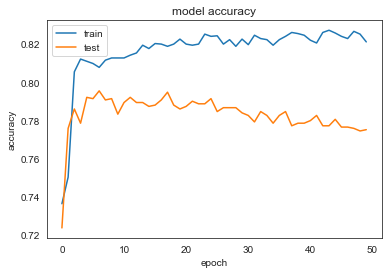

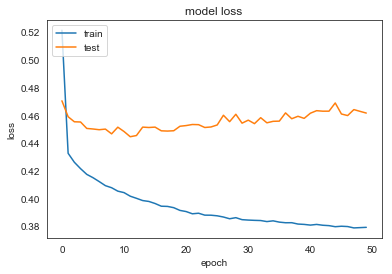

In [128]:

# list all data in history
print(ann_pca.history.keys())
# summarize history for accuracy
plt.plot(ann_pca.history['acc'])
plt.plot(ann_pca.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(ann_pca.history['loss'])
plt.plot(ann_pca.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(92.68, 0.5, 'predicted label')

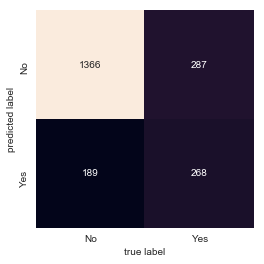

In [129]:
#Confusion Matrix
cm_ann = confusion_matrix(y_test, y_pred_ann_pca1)
sns.heatmap(cm_ann.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [130]:
acc_ann_pca= round(100*accuracy_score(y_test,y_pred_ann_pca1),2)
print(acc_ann_pca)


77.44


Text(92.68, 0.5, 'predicted label')

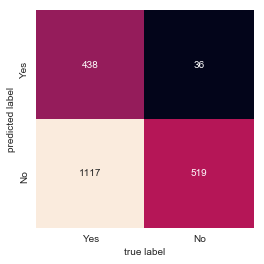

In [131]:
##EM with PCA
Gaussian = GaussianMixture(n_components=2,random_state=0)#covariance_type='tied')
Gaussian.fit(pca_X_train)
predictions_em_pca = Gaussian.predict(pca_X_test)
predictions_em_pca1= (predictions_em_pca>.5).astype('int')
probs = Gaussian.predict_proba(pca_X_test)

#Confusion Matrix
cm_em_pca= confusion_matrix(y_test, predictions_em_pca1)
sns.heatmap(cm_em_pca.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


In [132]:
acc_em_pca= round(100*accuracy_score(y_test,predictions_em_pca1),2)
print(acc_em_pca)


45.36


<h3>ICA</h3>

In [133]:
##ICA
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X=ICA.fit_transform(X_train)




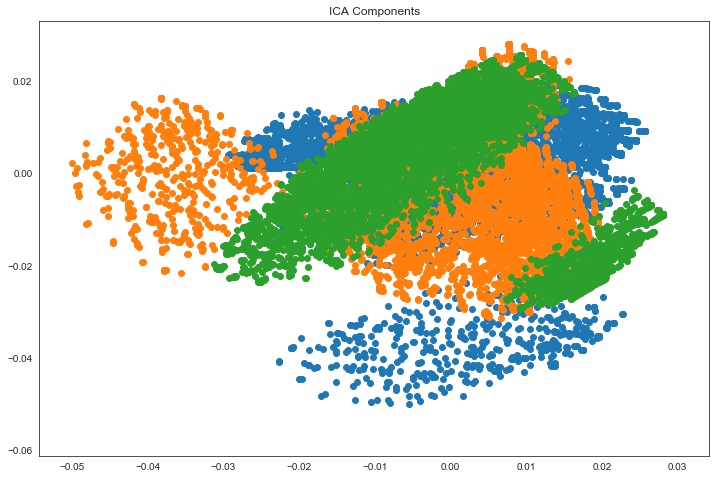

In [134]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,1], X[:,2])
plt.scatter(X[:,2], X[:,0])

In [135]:
ica_X_train = ICA.fit_transform(X_train)
ica_X_test = ICA.fit_transform(X_test)

In [136]:
## K means with ICA

kmeans_ica = KMeans(n_clusters=2, random_state=100)
ica2=FastICA(n_components=3, random_state=12)
X_kmeans_ica = ica2.fit_transform(ica_X_train)

kmeans_ica.fit(ica_X_train)

Prediction_kmeans_ica = kmeans_ica.fit_predict(ica_X_test)
prediction_kmeans_ica1= (Prediction_kmeans_ica>.5).astype('int')

acc_kmeans_ica= round(100*accuracy_score(y_test,prediction_kmeans_ica1),2)
print(acc_kmeans_ica)


54.64


Text(92.68, 0.5, 'predicted label')

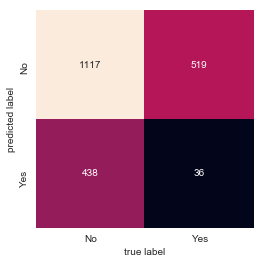

In [137]:
#Confusion Matrix
cm_kmeans_ica = confusion_matrix(y_test, prediction_kmeans_ica1)
sns.heatmap(cm_kmeans_ica.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(92.68, 0.5, 'predicted label')

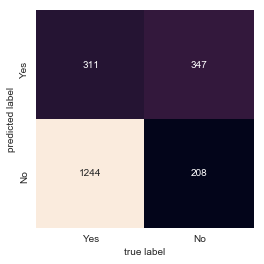

In [138]:
## EM with ICA

Gaussian = GaussianMixture(n_components=2,random_state=0)#covariance_type='tied')
Gaussian.fit(ica_X_train)
predictions_em_ica = Gaussian.predict(ica_X_test)
predictions_em_ica1= (predictions_em_ica>.5).astype('int')
probs = Gaussian.predict_proba(ica_X_test)

#Confusion Matrix
cm_em_ica= confusion_matrix(y_test, predictions_em_ica1)
sns.heatmap(cm_em_ica.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


In [139]:
acc_em_ica= round(100*accuracy_score(y_test,predictions_em_ica1),2)
print(acc_em_ica)


24.6


<h3>Randomised Projection</h3>

In [140]:
##Randomized Projection
from sklearn.random_projection import GaussianRandomProjection
grp = GaussianRandomProjection(n_components=3, eps=0.1, random_state=420)
rca_X_train = grp.fit_transform(X_train)
rca_X_test = grp.fit_transform(X_test)

In [141]:
##K means with RCA
kmeans_rca = KMeans(n_clusters=2, random_state=99)
rca2= PCA(n_components=2)
X_kmeans_RCA= rca2.fit_transform(rca_X_train)

kmeans_rca.fit(rca_X_train)

prediction_kmeans_rca = kmeans_pca.fit_predict(rca_X_test)
prediction_kmeans_rca1= (prediction_kmeans_rca>.5).astype('int')

##accuracy
acc_kmeans_rca= round(100*accuracy_score(y_test,prediction_kmeans_rca1),2)
print(acc_kmeans_rca)




64.74


Text(92.68, 0.5, 'predicted label')

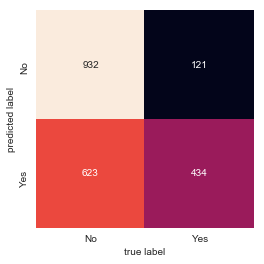

In [142]:
#Confusion Matrix
cm_kmeans_rca = confusion_matrix(y_test, prediction_kmeans_rca1)
sns.heatmap(cm_kmeans_rca.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(92.68, 0.5, 'predicted label')

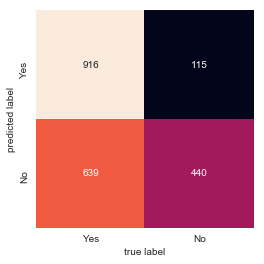

In [143]:
## EM with RP

Gaussian = GaussianMixture(n_components=2,random_state=0)#covariance_type='tied')
Gaussian.fit(rca_X_train)
predictions_em_rca = Gaussian.predict(rca_X_test)
predictions_em_rca1= (predictions_em_rca>.5).astype('int')
probs = Gaussian.predict_proba(rca_X_test)

#Confusion Matrix
cm_em_rca= confusion_matrix(y_test, predictions_em_rca1)
sns.heatmap(cm_em_rca.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


In [144]:
acc_em_rca= round(100*accuracy_score(y_test,predictions_em_rca1),2)
print(acc_em_rca)


64.27


<h3>Feature selection</h3>

In [145]:
##Feature Selection
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),  
           k_features=5,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=2)

In [146]:
features = feature_selector.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppDa

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   11.8s finished

[2019-12-07 00:07:05] Features: 4/5 -- score: 0.8133319074473434[Parallel(n_jobs=1)]: Using backend Sequential

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change fro

In [147]:
filtered_features= features.k_feature_idx_
filtered_features

(11, 16, 18, 36, 43)

<h3>K Means with forward selection</h3>

In [148]:
X_feature = np.array(df_dummies.iloc[:,[11,16,18,36,43]])
y_feature = np.array(df_dummies['Churn'])

In [149]:
X_feature.shape

(7032, 5)

In [150]:
y_feature.shape

(7032,)

In [151]:
X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y_feature, test_size=0.3, random_state=1)

In [152]:
##K means with Feature Selection
kmeans_feature = KMeans(n_clusters=2, random_state=99)
feature2= PCA(n_components=2)
X_kmeans_feature= feature2.fit_transform(X_train_feature)

kmeans_feature.fit(X_train_feature)

prediction_kmeans_feature = kmeans_feature.fit_predict(X_test_feature)
prediction_kmeans_feature1= (prediction_kmeans_feature>.5).astype('int')

##accuracy
acc_kmeans_feature= round(100*accuracy_score(y_test_feature,prediction_kmeans_feature1),2)
print(acc_kmeans_feature)


43.18


Text(92.68, 0.5, 'predicted label')

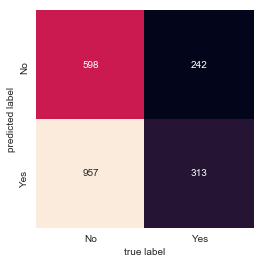

In [153]:
#Confusion Matrix
cm_kmeans_feature = confusion_matrix(y_test_feature, prediction_kmeans_feature1)
sns.heatmap(cm_kmeans_feature.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(92.68, 0.5, 'predicted label')

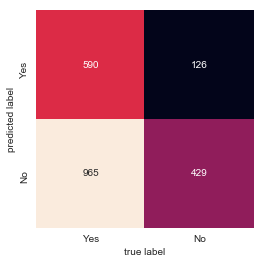

In [154]:
##EM with Feature

Gaussian = GaussianMixture(n_components=2,random_state=0)#covariance_type='tied')
Gaussian.fit(X_train_feature)
predictions_em_feature = Gaussian.predict(X_test_feature)
predictions_em_feature1= (predictions_em_feature>.5).astype('int')
probs = Gaussian.predict_proba(X_test_feature)

#Confusion Matrix
cm_em_feature= confusion_matrix(y_test_feature, predictions_em_feature1)
sns.heatmap(cm_em_feature.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [155]:
acc_em_feature= round(100*accuracy_score(y_test_feature,prediction_kmeans_feature1),2)
print(acc_em_feature)


43.18


,accuracy
Original,47.819905
PCA,54.640000
RCA,54.640000
ICA,64.740000
Step Forward Selection,43.180000


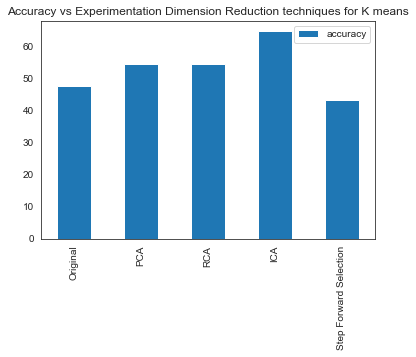

In [156]:
z_kmeans = pd.DataFrame(data = [acc_kmeans,acc_kmeans_pca,acc_kmeans_ica, acc_kmeans_rca, acc_kmeans_feature],index = ['Original','PCA','RCA', 'ICA', 'Step Forward Selection'],columns=[ "accuracy"])
#comparing results
z_kmeans.plot(kind = 'bar',title="Accuracy vs Experimentation Dimension Reduction techniques for K means")
z_kmeans

,accuracy
Original,52.18
PCA,45.36
RCA,24.60
ICA,64.27
Step Forward Selection,43.18


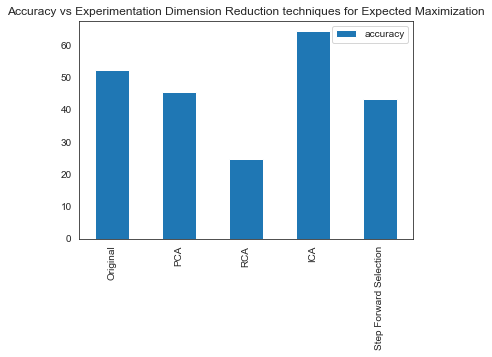

In [157]:
z_em = pd.DataFrame(data = [acc_em,acc_em_pca,acc_em_ica, acc_em_rca, acc_em_feature],index = ['Original','PCA','RCA', 'ICA', 'Step Forward Selection'],columns=[ "accuracy"])
#comparing results
z_em.plot(kind = 'bar',title="Accuracy vs Experimentation Dimension Reduction techniques for Expected Maximization")
z_em

<h1>The End for the second dataset</h1>